In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [24]:
observation = pd.read_csv('Data/observations_park.csv', index_col= 0, parse_dates= ['observed_on'])
observation.head(1)

,observed_on,place_guess,latitude,longitude,place_state_name,scientific_name,common_name,iconic_taxon_name,park,state,ParkName,Park
0,2008-08-08,"Yellowstone National Park, Park County, US-WY, US",44.811585,-110.481333,Wyoming,Bison bison,American Bison,Mammalia,Yellowstone National Park,WY,Yellowstone,Yellowstone NP


In [25]:
observation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15874 entries, 0 to 16582
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   observed_on        15874 non-null  datetime64[ns]
 1   place_guess        15874 non-null  object        
 2   latitude           15874 non-null  float64       
 3   longitude          15874 non-null  float64       
 4   place_state_name   15874 non-null  object        
 5   scientific_name    15874 non-null  object        
 6   common_name        15855 non-null  object        
 7   iconic_taxon_name  15874 non-null  object        
 8   park               15874 non-null  object        
 9   state              15874 non-null  object        
 10  ParkName           15874 non-null  object        
 11  Park               15874 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 1.6+ MB


<AxesSubplot:>

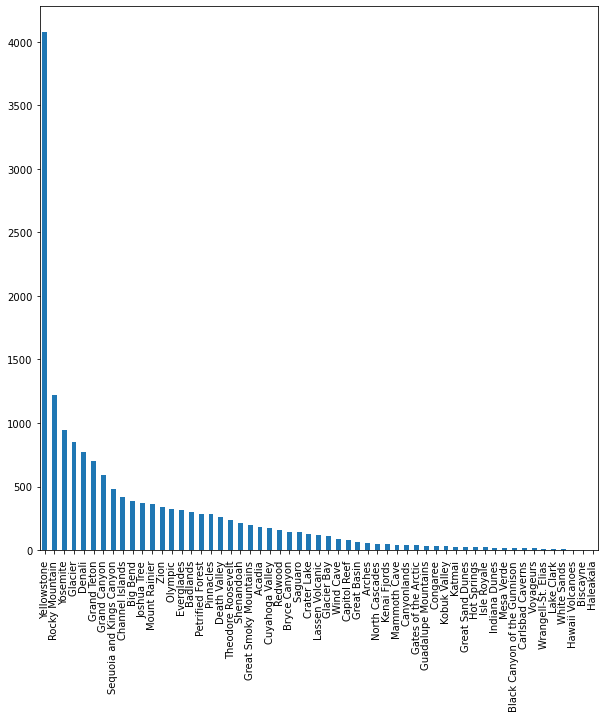

In [85]:
#observations per park total
plt.figure(figsize = (10,10))
observation['ParkName'].value_counts().plot(kind= 'bar')

<AxesSubplot:>

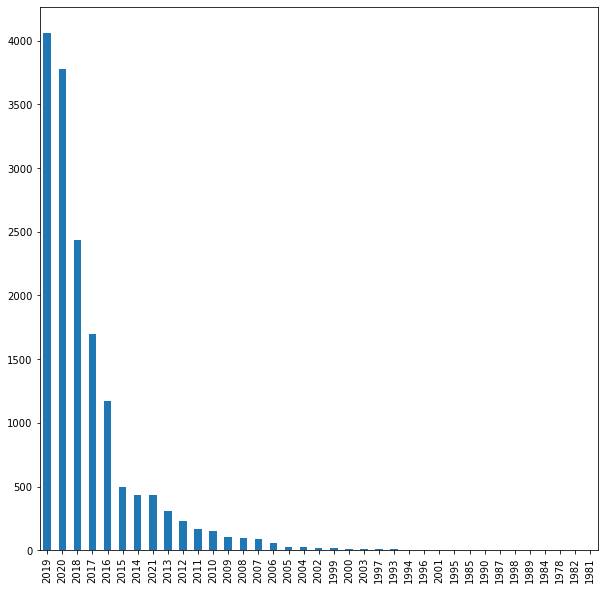

In [86]:
#observations per year
plt.figure(figsize = (10,10))
observation['observed_on'].dt.year.value_counts().plot(kind= 'bar')

In [28]:
#what year was inaturalist founded?? ans: Launched in 2008. drop all obs from before and all obs after 2019
observation1 = observation.sort_values(by= 'observed_on')
observation1 = observation.loc[(observation['observed_on']  >= '2008-1-1') & (observation['observed_on'] <= '2019-12-31')]

In [29]:
observation1.head(1)

,observed_on,place_guess,latitude,longitude,place_state_name,scientific_name,common_name,iconic_taxon_name,park,state,ParkName,Park
0,2008-08-08,"Yellowstone National Park, Park County, US-WY, US",44.811585,-110.481333,Wyoming,Bison bison,American Bison,Mammalia,Yellowstone National Park,WY,Yellowstone,Yellowstone NP


In [30]:
observation1.shape

(11358, 12)

In [31]:
df= observation1
df['observed_on'] = df['observed_on'].dt.strftime('%Y-%m')

<ipython-input-31-b4f50f15e7b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['observed_on'] = df['observed_on'].dt.strftime('%Y-%m')


In [32]:
df= observation1.set_index('observed_on', drop= True)

,place_guess,latitude,longitude,place_state_name,scientific_name,common_name,iconic_taxon_name,park,state,ParkName,Park
observed_on,,,,,,,,,,,
2008-08,"Yellowstone National Park, Park County, US-WY, US",44.811585,-110.481333,Wyoming,Bison bison,American Bison,Mammalia,Yellowstone National Park,WY,Yellowstone,Yellowstone NP
2009-05,"Everglades National Park, Monroe County, US-FL...",25.153938,-80.851790,Florida,Trichechus manatus,West Indian Manatee,Mammalia,Everglades National Park,FL,Everglades,Everglades NP


In [33]:
df.shape

(11358, 11)

In [34]:
#df1 = df.groupby(['Park', df.index.year, df.index.month]).agg({'latitude':'count', 'scientific_name': 'nunique', 'common_name': })
df1 = df.groupby(['Park', df.index]).agg({'latitude':'count', 'scientific_name': 'nunique'})
df1.rename(columns = {'latitude':'mammal_count', 'scientific_name': 'num_mammals_observed'}, inplace= True)
df1.tail()

mammal_count  num_mammals_observed
Park    observed_on                                    
Zion NP 2019-08                 9                     4
        2019-09                 4                     3
        2019-10                 4                     2
        2019-11                 5                     2
        2019-12                 3                     1

In [36]:
print(len(df.common_name.unique()), len(df.scientific_name.unique()))

287 296


In [38]:
# Where there is a 3rd word I need to remove it. No need for subspecies designations
df['scientific_name'] = df.scientific_name.apply(lambda x : " ".join(x.split()[0:2]))

In [40]:
df0= df[['scientific_name', 'Park']]
df0 = pd.get_dummies(df0,columns= ['scientific_name'], prefix = '', prefix_sep = '')
df0.head()

,Park,Alces alces,Alexandromys oeconomus,Ammospermophilus harrisii,Ammospermophilus leucurus,Ammotragus lervia,Antilocapra americana,Antilocapridae,Antrozous pallidus,Aplodontia rufa,...,Vespertilionidae,Vulpes macrotis,Vulpes vulpes,Xerinae,Xerospermophilus spilosoma,Xerospermophilus tereticaudus,Zalophus californianus,Zapus hudsonius,Zapus princeps,Zapus trinotatus
observed_on,,,,,,,,,,,,,,,,,,,,,
2008-08,Yellowstone NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-05,Everglades NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-06,Sequoia and Kings Canyon NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-06,Sequoia and Kings Canyon NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-04,Sequoia and Kings Canyon NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df0 = df0.groupby(['Park', df.index]).sum()
df0.head()

Alces alces  Alexandromys oeconomus  \
Park      observed_on                                        
Acadia NP 2014-06                0                       0   
          2014-07                0                       0   
          2014-08                0                       0   
          2015-10                0                       0   
          2015-11                0                       0   

                       Ammospermophilus harrisii  Ammospermophilus leucurus  \
Park      observed_on                                                         
Acadia NP 2014-06                              0                          0   
          2014-07                              0                          0   
          2014-08                              0                          0   
          2015-10                              0                          0   
          2015-11                              0                          0   

                       Ammotragus lervia  Antilocapra americana  \
Park      observed_on                                             
Acadia NP 2014-06                      0                      0   
          2014-07                      0                      0   
          2014-08                      0                      0   
          2015-10                      0                      0   
          2015-11                      0                      0   

                       Antilocapridae  Antrozous pallidus  Aplodontia rufa  \
Park      observed_on                                                        
Acadia NP 2014-06                   0                   0                0   
          2014-07                   0                   0                0   
          2014-08                   0                   0                0   
          2015-10                   0                   0                0   
          2015-11                   0                   0                0   

                       Arctocephalus townsendi  ...  Vespertilionidae  \
Park      observed_on                           ...                     
Acadia NP 2014-06                            0  ...                 0   
          2014-07                            0  ...                 0   
          2014-08                            0  ...                 0   
          2015-10                            0  ...                 0   
          2015-11                            0  ...                 0   

                       Vulpes macrotis  Vulpes vulpes  Xerinae  \
Park      observed_on                                            
Acadia NP 2014-06                    0              0        0   
          2014-07                    0              0        0   
          2014-08                    0              0        0   
          2015-10                    0              0        0   
          2015-11                    0              0        0   

                       Xerospermophilus spilosoma  \
Park      observed_on                               
Acadia NP 2014-06                               0   
          2014-07                               0   
          2014-08                               0   
          2015-10                               0   
          2015-11                               0   

                       Xerospermophilus tereticaudus  Zalophus californianus  \
Park      observed_on                                                          
Acadia NP 2014-06                                  0                       0   
          2014-07                                  0                       0   
          2014-08                                  0                       0   
          2015-10                                  0                       0   
          2015-11                                  0                       0   

                       Zapus hudsonius  Zapus princeps  Zapus trinotatus  
Park      observed_on             

In [42]:
df_merge = df1.merge(df0, on = ['Park', 'observed_on'])
df_merge.tail()

mammal_count  num_mammals_observed  Alces alces  \
Park    observed_on                                                    
Zion NP 2019-08                 9                     4            0   
        2019-09                 4                     3            0   
        2019-10                 4                     2            0   
        2019-11                 5                     2            0   
        2019-12                 3                     1            0   

                     Alexandromys oeconomus  Ammospermophilus harrisii  \
Park    observed_on                                                      
Zion NP 2019-08                           0                          0   
        2019-09                           0                          0   
        2019-10                           0                          0   
        2019-11                           0                          0   
        2019-12                           0                          0   

                     Ammospermophilus leucurus  Ammotragus lervia  \
Park    observed_on                                                 
Zion NP 2019-08                              0                  0   
        2019-09                              0                  0   
        2019-10                              0                  0   
        2019-11                              0                  0   
        2019-12                              0                  0   

                     Antilocapra americana  Antilocapridae  \
Park    observed_on                                          
Zion NP 2019-08                          0               0   
        2019-09                          0               0   
        2019-10                          0               0   
        2019-11                          0               0   
        2019-12                          0               0   

                     Antrozous pallidus  ...  Vespertilionidae  \
Park    observed_on                      ...                     
Zion NP 2019-08                       0  ...                 0   
        2019-09                       0  ...                 0   
        2019-10                       0  ...                 0   
        2019-11                       0  ...                 0   
        2019-12                       0  ...                 0   

                     Vulpes macrotis  Vulpes vulpes  Xerinae  \
Park    observed_on                                            
Zion NP 2019-08                    0              0        0   
        2019-09                    0              0        0   
        2019-10                    0              0        0   
        2019-11                    0              0        0   
        2019-12                    0              0        0   

                     Xerospermophilus spilosoma  \
Park    observed_on                               
Zion NP 2019-08                               0   
        2019-09                               0   
        2019-10                               0   
        2019-11                               0   
        2019-12                               0   

                     Xerospermophilus tereticaudus  Zalophus californianus  \
Park    observed_on                                                          
Zion NP 2019-08                                  0                       0   
        2019-09                                  0                       0   
        2019-10                                  0                       0   
        2019-11                                  0                       0   
        2019-12                                  0                       0   

                     Zapus hudsonius  Zapus princeps  Zapus trinotatus  
Park    observed_on                                                     
Zion NP 2019-08                    0               0                 0  
        2019-09                    0      

In [43]:
df_filter = df_merge.filter(['Park','observed_on', 'mammal_count', 'num_mammals_observed', 'Alces alces','Antilocapra americana','Bison bison','Ursus americanus','Ursus arctos','Cervus canadensis','Canis lupus','Trichechus manatus'])
df_filter.head()

mammal_count  num_mammals_observed  Alces alces  \
Park      observed_on                                                    
Acadia NP 2014-06                 1                     1            0   
          2014-07                 1                     1            0   
          2014-08                 1                     1            0   
          2015-10                 1                     1            0   
          2015-11                 1                     1            0   

                       Antilocapra americana  Bison bison  Ursus americanus  \
Park      observed_on                                                         
Acadia NP 2014-06                          0            0                 0   
          2014-07                          0            0                 0   
          2014-08                          0            0                 0   
          2015-10                          0            0                 0   
          2015-11                          0            0                 0   

                       Ursus arctos  Cervus canadensis  Canis lupus  \
Park      observed_on                                                 
Acadia NP 2014-06                 0                  0            0   
          2014-07                 0                  0            0   
          2014-08                 0                  0            0   
          2015-10                 0                  0            0   
          2015-11                 0                  0            0   

                       Trichechus manatus  
Park      observed_on                      
Acadia NP 2014-06                       0  
          2014-07                       0  
          2014-08                       0  
          2015-10                       0  
          2015-11                       0

In [44]:
df_filter.tail()

mammal_count  num_mammals_observed  Alces alces  \
Park    observed_on                                                    
Zion NP 2019-08                 9                     4            0   
        2019-09                 4                     3            0   
        2019-10                 4                     2            0   
        2019-11                 5                     2            0   
        2019-12                 3                     1            0   

                     Antilocapra americana  Bison bison  Ursus americanus  \
Park    observed_on                                                         
Zion NP 2019-08                          0            0                 0   
        2019-09                          0            0                 0   
        2019-10                          0            0                 0   
        2019-11                          0            0                 0   
        2019-12                          0            0                 0   

                     Ursus arctos  Cervus canadensis  Canis lupus  \
Park    observed_on                                                 
Zion NP 2019-08                 0                  0            0   
        2019-09                 0                  0            0   
        2019-10                 0                  0            0   
        2019-11                 0                  0            0   
        2019-12                 0                  0            0   

                     Trichechus manatus  
Park    observed_on                      
Zion NP 2019-08                       0  
        2019-09                       0  
        2019-10                       0  
        2019-11                       0  
        2019-12                       0

In [46]:
df_filter.shape

(1765, 10)

In [70]:
NP_visit = pd.read_csv('Data/NP_visit_for_merge.csv',index_col= 0, parse_dates= ['Month_Year'])
NP_visit['Month_Year'] = NP_visit['Month_Year'].dt.strftime('%Y-%m')
NP_visit.rename(mapper = {'Month_Year':'observed_on', 'ParkName':'Park'}, axis = 1, inplace= True)
NP_visit.head()

,observed_on,Park,ParkType,Region,State,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
0,1979-01,Acadia NP,National Park,Northeast,ME,6011,0,0,102,13,0
1,1979-02,Acadia NP,National Park,Northeast,ME,5243,0,0,53,8,0
2,1979-03,Acadia NP,National Park,Northeast,ME,11165,0,0,176,37,0
3,1979-04,Acadia NP,National Park,Northeast,ME,219351,0,0,1037,459,0
4,1979-05,Acadia NP,National Park,Northeast,ME,339416,0,0,3193,1148,0


In [62]:
NP_visit.shape

(29447, 11)

In [71]:
NP_visit.set_index(['Park', 'observed_on'], inplace = True)
NP_visit.shape

(29447, 9)

In [72]:
NP_visit.head()

ParkType      Region State  RecreationVisits  \
Park      observed_on                                                      
Acadia NP 1979-01      National Park  Northeast     ME              6011   
          1979-02      National Park  Northeast     ME              5243   
          1979-03      National Park  Northeast     ME             11165   
          1979-04      National Park  Northeast     ME            219351   
          1979-05      National Park  Northeast     ME            339416   

                       ConcessionerLodging  ConcessionerCamping  TentCampers  \
Park      observed_on                                                          
Acadia NP 1979-01                        0                    0          102   
          1979-02                        0                    0           53   
          1979-03                        0                    0          176   
          1979-04                        0                    0         1037   
          1979-05                        0                    0         3193   

                       RVCampers  Backcountry  
Park      observed_on                          
Acadia NP 1979-01             13            0  
          1979-02              8            0  
          1979-03             37            0  
          1979-04            459            0  
          1979-05           1148            0

In [73]:
obs_visit = df_filter.merge(NP_visit, left_index = True, right_index = True)

In [74]:
obs_visit.tail()

mammal_count  num_mammals_observed  Alces alces  \
Park    observed_on                                                    
Zion NP 2019-08                 9                     4            0   
        2019-09                 4                     3            0   
        2019-10                 4                     2            0   
        2019-11                 5                     2            0   
        2019-12                 3                     1            0   

                     Antilocapra americana  Bison bison  Ursus americanus  \
Park    observed_on                                                         
Zion NP 2019-08                          0            0                 0   
        2019-09                          0            0                 0   
        2019-10                          0            0                 0   
        2019-11                          0            0                 0   
        2019-12                          0            0                 0   

                     Ursus arctos  Cervus canadensis  Canis lupus  \
Park    observed_on                                                 
Zion NP 2019-08                 0                  0            0   
        2019-09                 0                  0            0   
        2019-10                 0                  0            0   
        2019-11                 0                  0            0   
        2019-12                 0                  0            0   

                     Trichechus manatus       ParkType          Region State  \
Park    observed_on                                                            
Zion NP 2019-08                       0  National Park  Intermountain     UT   
        2019-09                       0  National Park  Intermountain     UT   
        2019-10                       0  National Park  Intermountain     UT   
        2019-11                       0  National Park  Intermountain     UT   
        2019-12                       0  National Park  Intermountain     UT   

                     RecreationVisits  ConcessionerLodging  \
Park    observed_on                                          
Zion NP 2019-08                535322                11167   
        2019-09                497443                 8633   
        2019-10                429604                 6762   
        2019-11                230180                 6291   
        2019-12                171706                 5752   

                     ConcessionerCamping  TentCampers  RVCampers  Backcountry  
Park    observed_on                                                            
Zion NP 2019-08                        0        17568       8042         1721  
        2019-09                        0        12482       8182         2007  
        2019-10                        0        11009       8969         2117  
        2019-11                        0         5650       5774          970  
        2019-12                        0         1895       1493          166

In [76]:
obs_visit.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1765 entries, ('Acadia NP', '2014-06') to ('Zion NP', '2019-12')
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   mammal_count           1765 non-null   int64 
 1   num_mammals_observed   1765 non-null   int64 
 2   Alces alces            1765 non-null   uint8 
 3   Antilocapra americana  1765 non-null   uint8 
 4   Bison bison            1765 non-null   uint8 
 5   Ursus americanus       1765 non-null   uint8 
 6   Ursus arctos           1765 non-null   uint8 
 7   Cervus canadensis      1765 non-null   uint8 
 8   Canis lupus            1765 non-null   uint8 
 9   Trichechus manatus     1765 non-null   uint8 
 10  ParkType               1765 non-null   object
 11  Region                 1765 non-null   object
 12  State                  1765 non-null   object
 13  RecreationVisits       1765 non-null   int64 
 14  ConcessionerLodging    1765 non

In [77]:
obs_visit.corr()

,mammal_count,num_mammals_observed,Alces alces,Antilocapra americana,Bison bison,Ursus americanus,Ursus arctos,Cervus canadensis,Canis lupus,Trichechus manatus,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
mammal_count,1.000000,0.843897,0.459406,0.660263,0.797888,0.722161,0.704599,0.746920,0.675696,0.010664,0.341992,0.385042,0.428192,0.191364,0.245794,0.135695
num_mammals_observed,0.843897,1.000000,0.422892,0.498486,0.575209,0.564181,0.552436,0.597918,0.511593,-0.020400,0.387209,0.384668,0.412542,0.267899,0.318410,0.175368
Alces alces,0.459406,0.422892,1.000000,0.217524,0.094362,0.206531,0.266101,0.435665,0.111060,-0.022640,0.188311,0.031492,0.140001,0.019542,0.046292,0.042824
Antilocapra americana,0.660263,0.498486,0.217524,1.000000,0.687423,0.535555,0.502480,0.511801,0.578835,-0.022917,0.154786,0.278422,0.374550,-0.015483,0.025522,-0.005251
Bison bison,0.797888,0.575209,0.094362,0.687423,1.000000,0.593044,0.646490,0.651864,0.765489,-0.019593,0.246823,0.458623,0.578397,0.059991,0.109203,0.044800
Ursus americanus,0.722161,0.564181,0.206531,0.535555,0.593044,1.000000,0.467288,0.436711,0.445455,-0.008966,0.171093,0.286776,0.260377,0.193786,0.214376,0.094972
Ursus arctos,0.704599,0.552436,0.266101,0.502480,0.646490,0.467288,1.000000,0.401052,0.652066,-0.027444,0.197668,0.311254,0.377350,0.053792,0.158709,0.037749
Cervus canadensis,0.746920,0.597918,0.435665,0.511801,0.651864,0.436711,0.401052,1.000000,0.520249,-0.028727,0.328943,0.306346,0.351748,0.096294,0.113662,0.159017
Canis lupus,0.675696,0.511593,0.111060,0.578835,0.765489,0.445455,0.652066,0.520249,1.000000,-0.022546,0.182997,0.377129,0.476210,0.030402,0.095896,0.038523
Trichechus manatus,0.010664,-0.020400,-0.022640,-0.022917,-0.019593,-0.008966,-0.027444,-0.028727,-0.022546,1.000000,-0.059343,-0.057851,-0.023153,-0.068709,-0.068280,-0.046177


<AxesSubplot:>

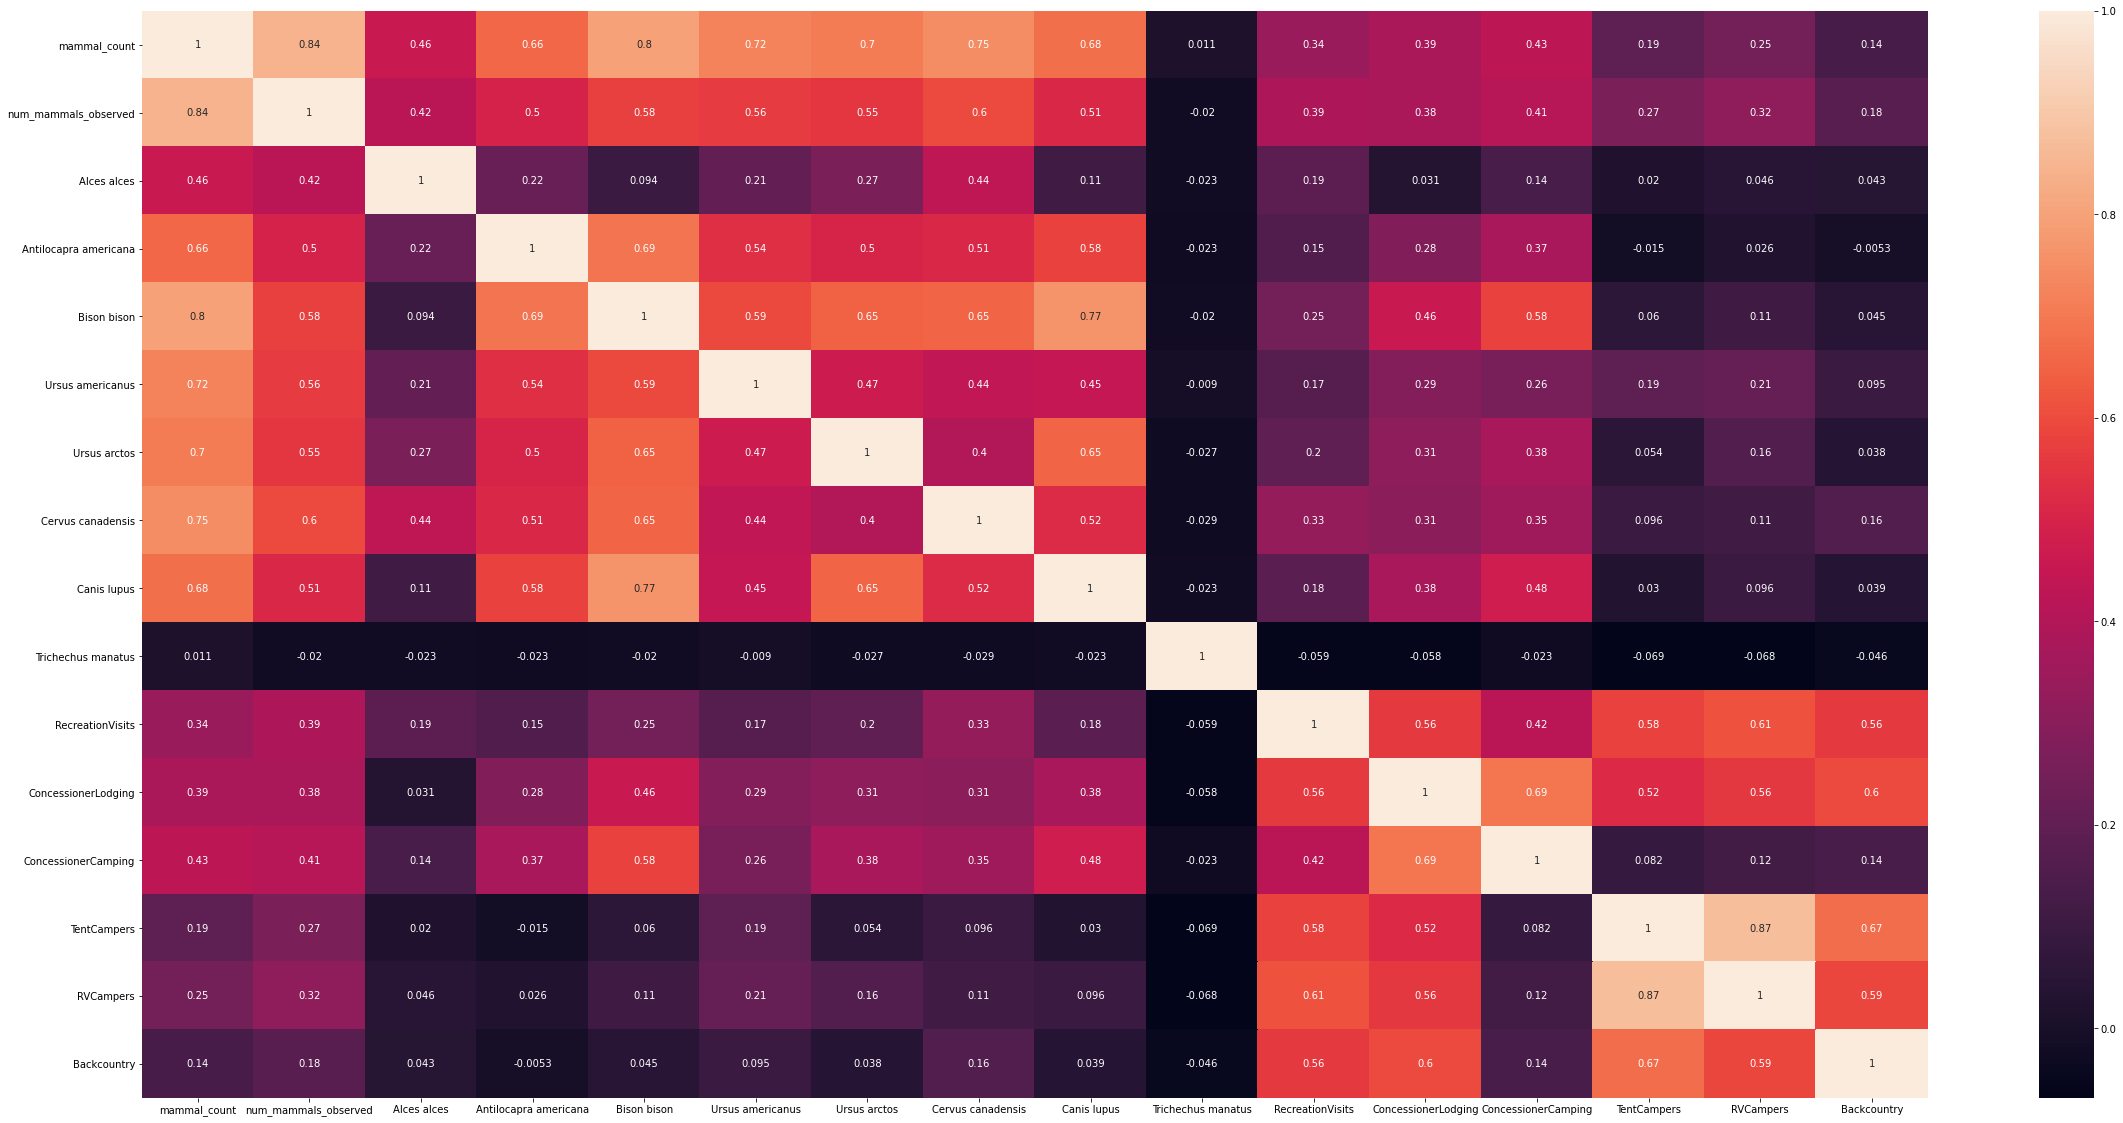

In [79]:
plt.figure(figsize = (40,20))
sns.heatmap(obs_visit.corr(), annot = True)